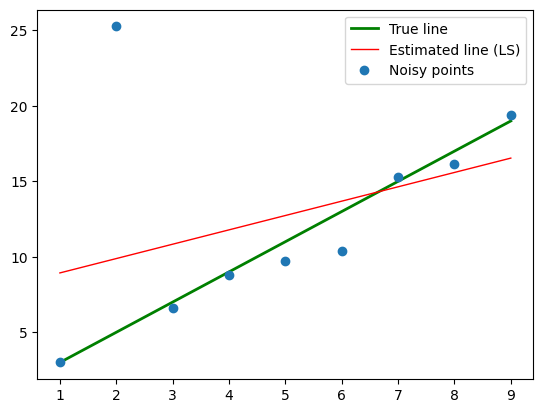

In [7]:

# Least-squares line fitting
import numpy as np
import matplotlib.pyplot as plt

# Genrating the true line y = m*x + c
m = 2 # gradient 
c = 1 # intercept
x = np.arange(1,10, 1)
np.random.seed(45)
no = np.random.randn(len(x)) #Noise
o = np.zeros(x.shape)

# o[1] = 20

y = m*x + c + no + o

n = len(x)

X = np.concatenate([x.reshape(n,1), np.ones((n, 1))], axis=1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y
mstar = B[0]
cstar = B[1]

plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c], color='g', linewidth=2, label=r'True line')
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + cstar], color='r', linewidth=1, label=r'Estimated line (LS)')
plt.plot(x,y, 'o', label='Noisy points')
plt.legend(loc='best')
plt.show()

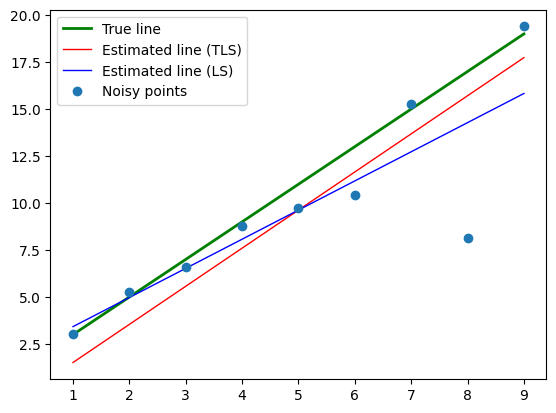

In [10]:
#Least-squares line fitting and total least squares line fitting
import numpy as np
import matplotlib.pyplot as plt

# Genrating the true line y = m*x + c
m = 2 # gradient 
c = 1 # intercept
x = np.arange(1,10, 1)
np.random.seed(45)
noise = np.random.randn(len(x))
o = np.zeros(x.shape)
o[-2] = -8
#o[-4] = -18
y = m*x + c + noise + o

n = len(x)
#Total least squares solution
u11 = np.sum((x - np.mean(x))**2)
u12 = np.sum((x - np.mean(x))*(y - np.mean(y)))
u21 = u12
u22 = np.sum((y - np.mean(y))**2)
U = np.array([[u11, u12], [u21, u22]])
w, v = np.linalg.eig(U)
smallest_eigenvector = v[:, np.argmin(w)]
a = smallest_eigenvector[0]
b = smallest_eigenvector[1]
d = a*np.mean(x) + b*np.mean(y)
mstar = -a/b
cstar = d/b

#Least-squares solution
X = np.concatenate([x.reshape(n,1), np.ones((n, 1))], axis=1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y
mstar_LS = B[0]
cstar_LS = B[1]

plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c], color='g', linewidth=2, label=r'True line')
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + cstar], color='r', linewidth=1, label=r'Estimated line (TLS)')
plt.plot([x[0], x[-1]], [mstar_LS*x[0] + cstar_LS, mstar_LS*x[-1] + cstar_LS], color='b', linewidth=1, label=r'Estimated line (LS)')
plt.plot(x,y, 'o', label='Noisy points')
plt.legend(loc='best')

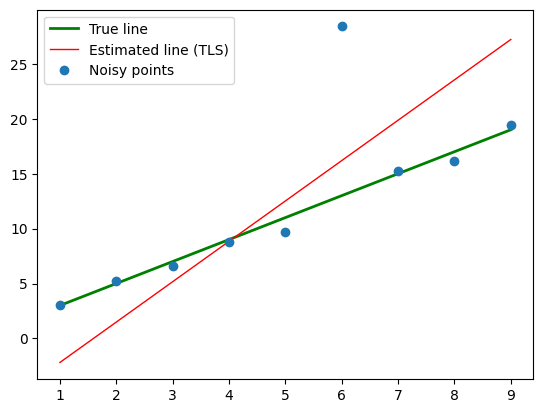

In [2]:
# Total least squares line fitting
import numpy as np
import matplotlib.pyplot as plt

# Genrating the true line y = m*x + c
m = 2 # gradient 
c = 1 # intercept
x = np.arange(1,10, 1)
np.random.seed(45)
noise = np.random.randn(len(x))
o = np.zeros(x.shape)
#o[-2] = 28
o[-4] = 18
y = m*x + c + noise + o

n = len(x)

u11 = np.sum((x - np.mean(x))**2)
u12 = np.sum((x - np.mean(x))*(y - np.mean(y)))
u21 = u12
u22 = np.sum((y - np.mean(y))**2)
U = np.array([[u11, u12], [u21, u22]])
w, v = np.linalg.eig(U)
smallest_eigenvector = v[:, np.argmin(w)]
a = smallest_eigenvector[0]
b = smallest_eigenvector[1]
d = a*np.mean(x) + b*np.mean(y)
mstar = -a/b
cstar = d/b



plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c], color='g', linewidth=2, label=r'True line')
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + cstar], color='r', linewidth=1, label=r'Estimated line (TLS)')
plt.plot(x,y, 'o', label='Noisy points')
plt.legend(loc='best')